# Date Fruit Datasets

data from [kaggle](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets/data)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('Date_Fruit_Datasets.xlsx', engine='openpyxl')
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

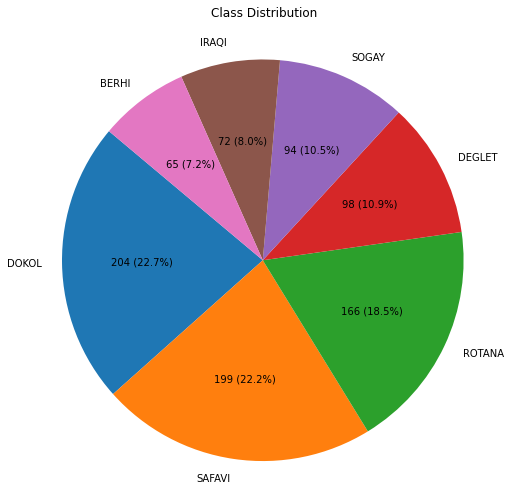

In [5]:
class_counts = data['Class'].value_counts()

# 畫圖
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(class_counts) / 100, p), startangle=140)
plt.axis('equal')  # 正圓

plt.title('Class Distribution', y=1.05)

plt.show()

In [6]:
class_mapping = {
    'BERHI': 0,
    'DEGLET': 1,
    'DOKOL': 2,
    'IRAQI': 3,
    'ROTANA': 4,
    'SAFAVI': 5,
    'SOGAY': 6
}

# 將類別型標籤替換為數字標籤
data['Class'] = data['Class'].replace(class_mapping)

In [7]:
# 相關矩陣
correlation_matrix = data.corr()

# 相關係數排名
class_correlation = correlation_matrix['Class'].sort_values(ascending=False)
# 前五跟後五的相關係數
print("Top 5 Correlated Features:")
print(class_correlation.head(5))
print("---------------------------")
print("Bottom 5 Correlated Features:")
print(class_correlation.tail(5))

Top 5 Correlated Features:
Class         1.000000
MAJOR_AXIS    0.479079
SkewRR        0.440968
PERIMETER     0.420245
SkewRG        0.390856
Name: Class, dtype: float64
---------------------------
Bottom 5 Correlated Features:
MeanRR          -0.416424
SHAPEFACTOR_2   -0.425621
MeanRG          -0.444107
ALLdaub4RG      -0.444114
ROUNDNESS       -0.488274
Name: Class, dtype: float64


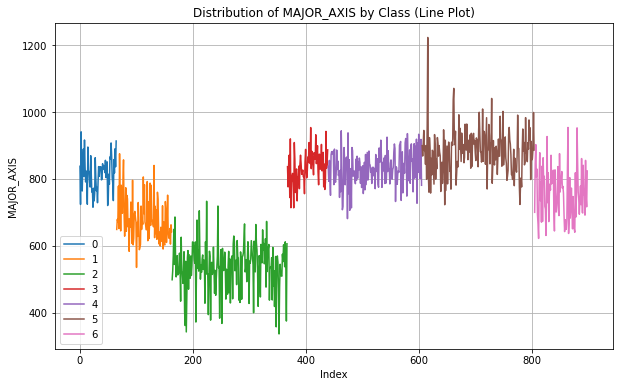

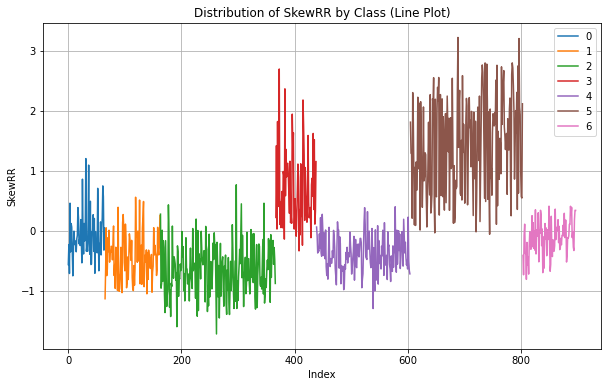

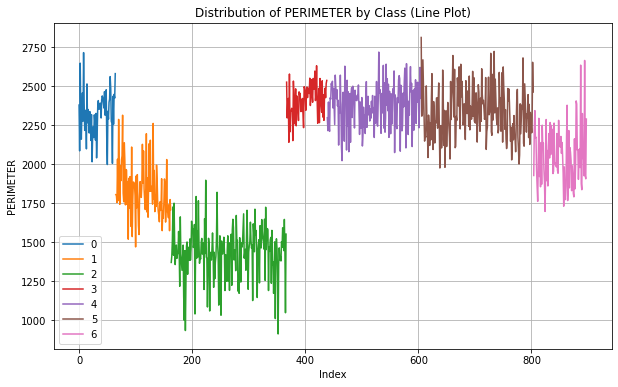

In [8]:
# MAJOR_AXIS
plt.figure(figsize=(10, 6))
for class_name, class_data in data.groupby('Class'):
    sns.lineplot(x=class_data.index, y='MAJOR_AXIS', data=class_data, label=class_name)
plt.xlabel('Index')
plt.ylabel('MAJOR_AXIS')
plt.title('Distribution of MAJOR_AXIS by Class (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

# SkewRR
plt.figure(figsize=(10, 6))
for class_name, class_data in data.groupby('Class'):
    sns.lineplot(x=class_data.index, y='SkewRR', data=class_data, label=class_name)
plt.xlabel('Index')
plt.ylabel('SkewRR')
plt.title('Distribution of SkewRR by Class (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

# PERIMETER
plt.figure(figsize=(10, 6))
for class_name, class_data in data.groupby('Class'):
    sns.lineplot(x=class_data.index, y='PERIMETER', data=class_data, label=class_name)
plt.xlabel('Index')
plt.ylabel('PERIMETER')
plt.title('Distribution of PERIMETER by Class (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [10]:
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
893    6
894    6
895    6
896    6
897    6
Name: Class, Length: 898, dtype: int64

In [12]:
from sklearn.preprocessing import minmax_scale  
X = minmax_scale(X) 
X

array([[0.77227446, 0.77207865, 0.56560444, ..., 0.67351302, 0.55053709,
        0.4946647 ],
       [0.61783464, 0.61747978, 0.43690403, ..., 0.53892305, 0.51634149,
        0.49450116],
       [0.96467405, 0.9133745 , 0.6817325 , ..., 0.77796738, 0.61978216,
        0.57350706],
       ...,
       [0.46380101, 0.53411457, 0.46362467, ..., 0.44774729, 0.32417389,
        0.36261751],
       [0.43554209, 0.52334284, 0.42881001, ..., 0.55750041, 0.40280492,
        0.45206697],
       [0.62823025, 0.72490601, 0.5497979 , ..., 0.4974535 , 0.29056351,
        0.33754565]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.linear_model import LogisticRegression #邏輯回歸
from sklearn.tree import DecisionTreeClassifier #決策樹
from sklearn.ensemble import RandomForestClassifier #隨機森林
from sklearn.ensemble import GradientBoostingClassifier #梯度提升機
from sklearn.svm import SVC #支持向量機
from sklearn.neural_network import MLPClassifier #多層感知機
import xgboost as xgb #XGBoost
import lightgbm as lgb #LightGBM

In [15]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    MLPClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier()
]

In [16]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# 定義準確度評量指標
scorer = make_scorer(accuracy_score)

# 初始化空列表來儲存模型的準確度和交叉驗證得分
accuracies = []
cv_scores = []

# 對每個模型進行循環
for model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # append accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # append cv score
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    cv_scores.append(np.mean(cv_score))
    
    # print confusion matrix / classification report
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------")

Model: LogisticRegression
Confusion Matrix:
[[12  0  0  2  2  0  1]
 [ 0 12  9  0  0  1  6]
 [ 0  3 46  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  0  0 51  1]
 [ 0  0  0  0  4  2 18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.80      0.43      0.56        28
           2       0.84      0.94      0.88        49
           3       0.90      1.00      0.95        19
           4       0.86      1.00      0.92        36
           5       0.94      0.98      0.96        52
           6       0.69      0.75      0.72        24

    accuracy                           0.86       225
   macro avg       0.86      0.83      0.83       225
weighted avg       0.86      0.86      0.85       225

------------------------
Model: DecisionTreeClassifier
Confusion Matrix:
[[ 6  0  0  8  1  0  2]
 [ 0 14  6  0  0  0  8]
 [ 0  2 46  0  0  0  1]
 [ 3  0  0 16  0  0  

In [17]:
# accurcay / cv_score
for model, accuracy, cv_score in zip(models, accuracies, cv_scores):
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Mean CV Score: {cv_score:.3f}")
    print("------------------------")

Model: LogisticRegression
Accuracy: 0.862
Mean CV Score: 0.877
------------------------
Model: DecisionTreeClassifier
Accuracy: 0.800
Mean CV Score: 0.825
------------------------
Model: RandomForestClassifier
Accuracy: 0.871
Mean CV Score: 0.888
------------------------
Model: GradientBoostingClassifier
Accuracy: 0.884
Mean CV Score: 0.872
------------------------
Model: SVC
Accuracy: 0.902
Mean CV Score: 0.900
------------------------
Model: MLPClassifier
Accuracy: 0.902
Mean CV Score: 0.900
------------------------
Model: XGBClassifier
Accuracy: 0.893
Mean CV Score: 0.887
------------------------
Model: LGBMClassifier
Accuracy: 0.880
Mean CV Score: 0.887
------------------------
